In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

# plotting settings
%matplotlib inline
sns.set(style="whitegrid")


In [3]:
df = pd.read_csv('coffeeQuality.csv')  # adjust path if needed
df.shape, df.head(3)


((1339, 44),
    Unnamed: 0  Species                     Owner Country.of.Origin  \
 0           0  Arabica                 metad plc          Ethiopia   
 1           1  Arabica                 metad plc          Ethiopia   
 2           2  Arabica  grounds for health admin         Guatemala   
 
                                   Farm.Name Lot.Number       Mill ICO.Number  \
 0                                 metad plc        NaN  metad plc  2014/2015   
 1                                 metad plc        NaN  metad plc  2014/2015   
 2  san marcos barrancas "san cristobal cuch        NaN        NaN        NaN   
 
                              Company       Altitude  ...  Color  \
 0  metad agricultural developmet plc      1950-2200  ...  Green   
 1  metad agricultural developmet plc      1950-2200  ...  Green   
 2                                NaN  1600 - 1800 m  ...    NaN   
 
   Category.Two.Defects       Expiration                  Certification.Body  \
 0                   

In [4]:
print("Shape:", df.shape)
display(df.info())
display(df.describe(include='all').T)


Shape: (1339, 44)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1339 non-null   int64  
 1   Species                1339 non-null   object 
 2   Owner                  1332 non-null   object 
 3   Country.of.Origin      1338 non-null   object 
 4   Farm.Name              980 non-null    object 
 5   Lot.Number             276 non-null    object 
 6   Mill                   1021 non-null   object 
 7   ICO.Number             1180 non-null   object 
 8   Company                1130 non-null   object 
 9   Altitude               1113 non-null   object 
 10  Region                 1280 non-null   object 
 11  Producer               1107 non-null   object 
 12  Number.of.Bags         1338 non-null   float64
 13  Bag.Weight             1339 non-null   object 
 14  In.Country.Partner     1339 non-null  

None

count unique  \
Unnamed: 0             1339.0    NaN   
Species                  1339      2   
Owner                    1332    315   
Country.of.Origin        1338     36   
Farm.Name                 980    571   
Lot.Number                276    227   
Mill                     1021    459   
ICO.Number               1180    845   
Company                  1130    281   
Altitude                 1113    396   
Region                   1280    356   
Producer                 1107    692   
Number.of.Bags         1338.0    NaN   
Bag.Weight               1339     56   
In.Country.Partner       1339     27   
Harvest.Year             1292     46   
Grading.Date             1339    567   
Owner.1                  1332    319   
Variety                  1113     29   
Processing.Method        1169      5   
Aroma                  1339.0    NaN   
Flavor                 1339.0    NaN   
Aftertaste             1339.0    NaN   
Acidity                1339.0    NaN   
Body                   1339.0    NaN   
Balance                1339.0    NaN   
Uniformity             1339.0    NaN   
Clean.Cup              1339.0    NaN   
Sweetness              1339.0    NaN   
Cupper.Points          1339.0    NaN   
Total.Cup.Points       1339.0    NaN   
Moisture               1339.0    NaN   
Category.One.Defects   1339.0    NaN   
Quakers                1338.0    NaN   
Color                    1069      3   
Category.Two.Defects   1339.0    NaN   
Expiration               1339    566   
Certification.Body       1339     26   
Certification.Address    1339     32   
Certification.Contact    1339     29   
unit_of_measurement      1339      2   
altitude_low_meters    1109.0    NaN   
altitude_high_meters   1109.0    NaN   
altitude_mean_meters   1109.0    NaN   

                                                            top  freq  \
Unnamed: 0                                                  NaN   NaN   
Species                                                 Arabica  1311   
Owner                                 juan luis alvarado romero   155   
Country.of.Origin                                        Mexico   236   
Farm.Name                                               various    47   
Lot.Number                                                    1    18   
Mill                                           beneficio ixchel    90   
ICO.Number                                                    0    79   
Company                                    unex guatemala, s.a.    86   
Altitude                                                   1100    43   
Region                                                    huila   112   
Producer                                               La Plata    30   
Number.of.Bags                                              NaN   NaN   
Bag.Weight                                                 1 kg   331   
In.Country.Partner                 Specialty Coffee Association   313   
Harvest.Year                                               2012   354   
Grading.Date                                    July 11th, 2012    25   
Owner.1                               Juan Luis Alvarado Romero   155   
Variety                                                 Caturra   256   
Processing.Method                                  Washed / Wet   815   
Aroma                                                       NaN   NaN   
Flavor                                                      NaN   NaN   
Aftertaste                                                  NaN   NaN   
Acidity                                                     NaN   NaN   
Body                                                        NaN   NaN   
Balance                                                     NaN   NaN   
Uniformity                                                  NaN   NaN   
Clean.Cup                                                   NaN   NaN   
Sweetness                                                   NaN   NaN   
Cupper.Points                    

In [5]:
df_raw = df.copy()

In [6]:
# Standardize column names (lowercase, strip)
df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]
df.columns


Index(['unnamed:_0', 'species', 'owner', 'country.of.origin', 'farm.name',
       'lot.number', 'mill', 'ico.number', 'company', 'altitude', 'region',
       'producer', 'number.of.bags', 'bag.weight', 'in.country.partner',
       'harvest.year', 'grading.date', 'owner.1', 'variety',
       'processing.method', 'aroma', 'flavor', 'aftertaste', 'acidity', 'body',
       'balance', 'uniformity', 'clean.cup', 'sweetness', 'cupper.points',
       'total.cup.points', 'moisture', 'category.one.defects', 'quakers',
       'color', 'category.two.defects', 'expiration', 'certification.body',
       'certification.address', 'certification.contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [7]:
# Check duplicates
dups = df.duplicated().sum()
print("Duplicate rows:", dups)
# If duplicates > 0, remove them (document decision)
if dups > 0:
    df = df.drop_duplicates()


Duplicate rows: 0


In [8]:
# Missing values summary
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]


lot.number              1063
farm.name                359
mill                     318
color                    270
producer                 232
altitude_mean_meters     230
altitude_high_meters     230
altitude_low_meters      230
altitude                 226
variety                  226
company                  209
processing.method        170
ico.number               159
region                    59
harvest.year              47
owner                      7
owner.1                    7
number.of.bags             1
country.of.origin          1
quakers                    1
dtype: int64

In [9]:
# Handling missing values - strategy examples
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Example: impute numeric columns with median (customize per column)
for col in numeric_cols:
    miss = df[col].isnull().sum()
    if miss > 0 and miss / len(df) < 0.2:
        df[col] = df[col].fillna(df[col].median())

# Example: fill categorical with 'Unknown'
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna('Unknown')


In [10]:
#Fix inconsistent categories (example for species)
if 'species' in df.columns:
    df['species'] = df['species'].astype(str).str.strip().str.lower()
    df['species'] = df['species'].replace({'arabica': 'arabica', 'robusta': 'robusta'})  # add more mappings if needed
    df['species'].value_counts()


In [11]:
# Convert numeric columns that may be read as object (e.g., 'aroma' as string)
for col in numeric_cols:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col].str.replace(',', '').str.strip(), errors='coerce')


In [12]:
# Outlier detection (IQR) for numeric quality metrics
def remove_outliers_iqr(df, cols, k=1.5):
    df2 = df.copy()
    for col in cols:
        if pd.api.types.is_numeric_dtype(df2[col]):
            q1 = df2[col].quantile(0.25)
            q3 = df2[col].quantile(0.75)
            iqr = q3 - q1
            lower = q1 - k*iqr
            upper = q3 + k*iqr
            
            mask = (df2[col] >= lower) & (df2[col] <= upper)
            
    return df2
outlier_check = remove_outliers_iqr(df, numeric_cols)


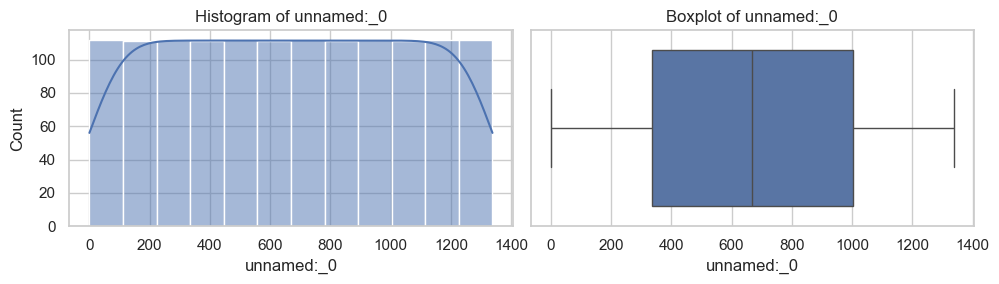

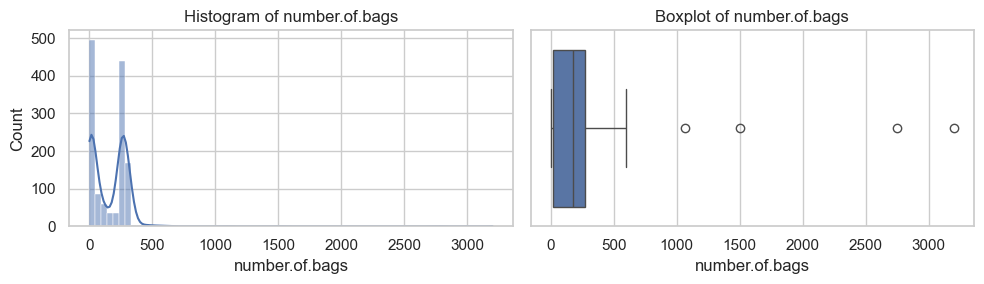

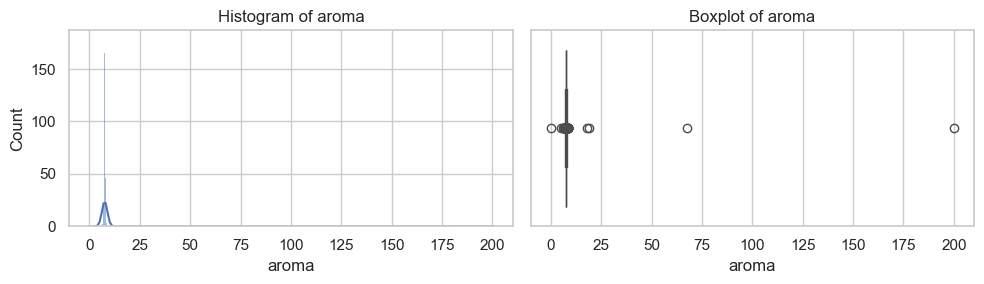

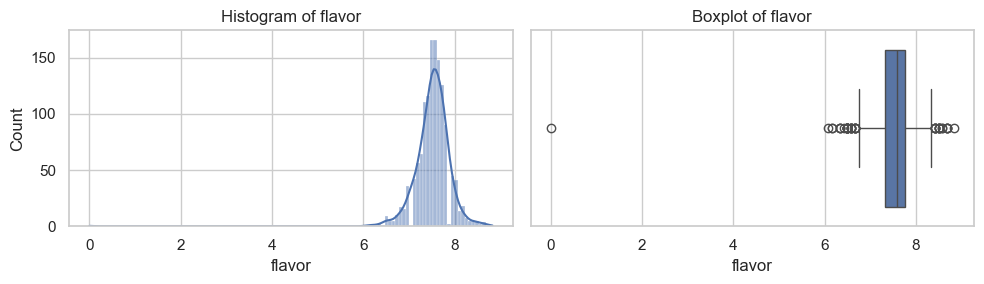

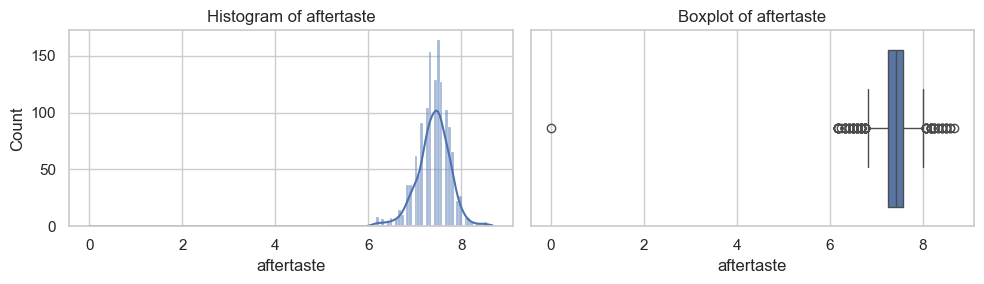

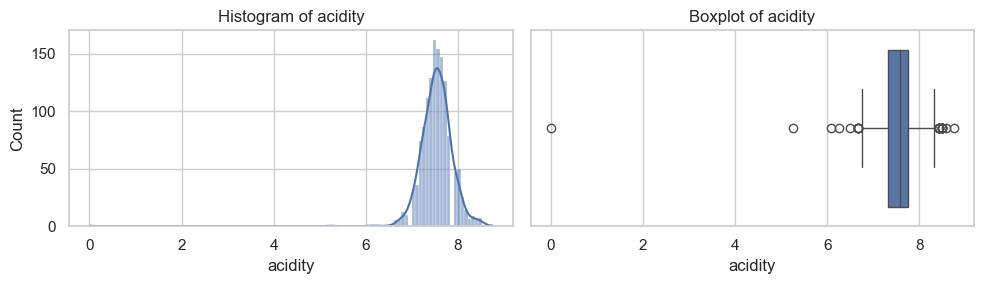

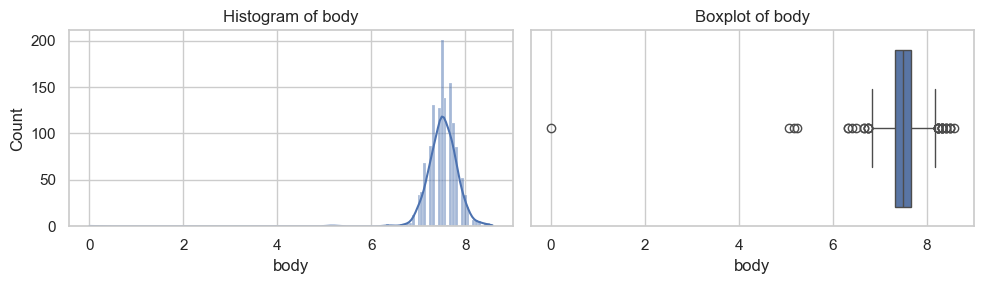

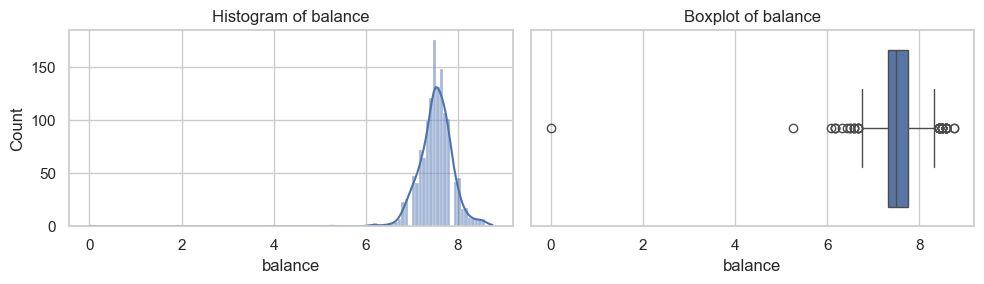

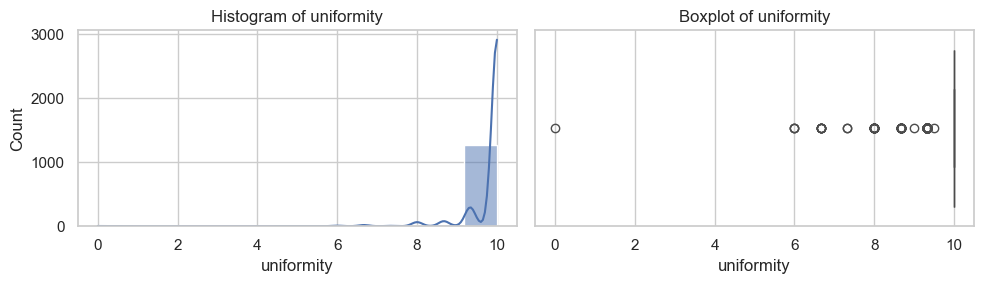

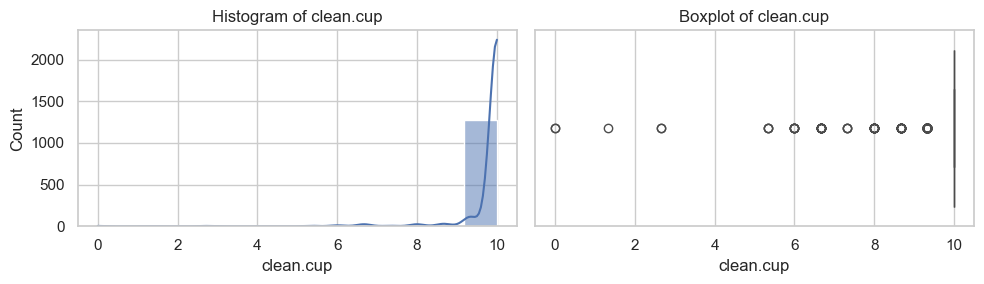

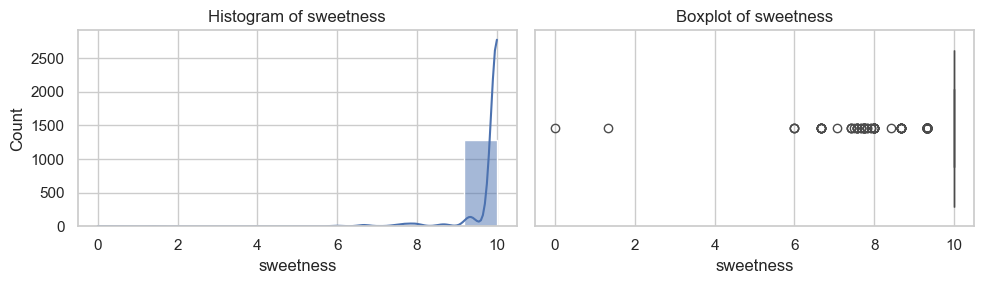

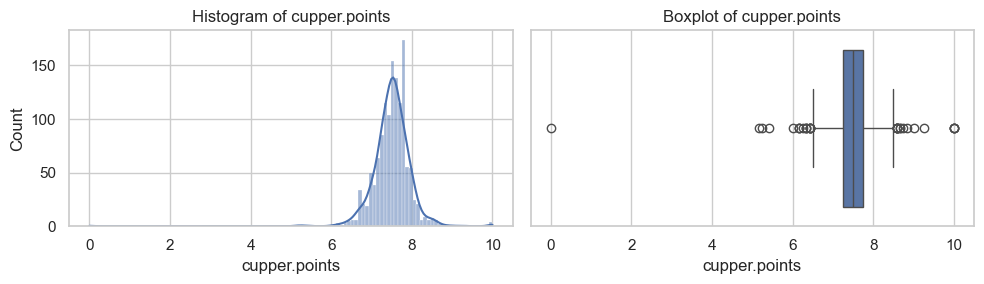

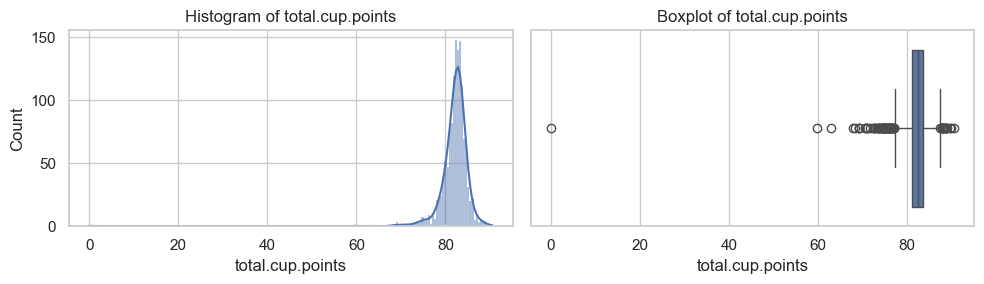

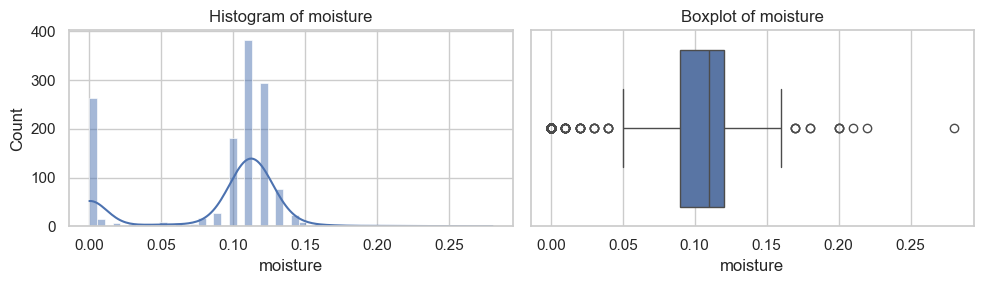

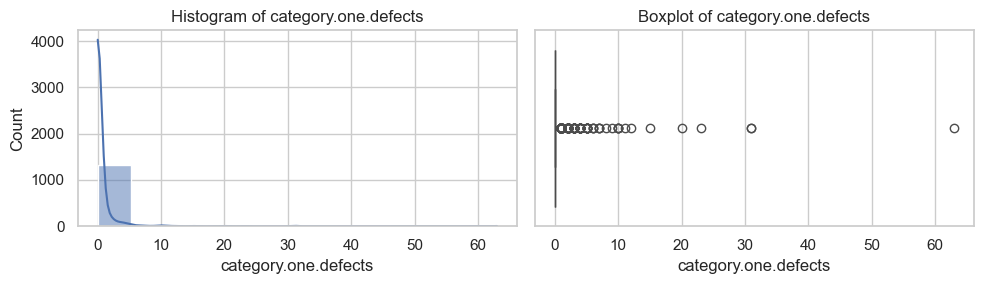

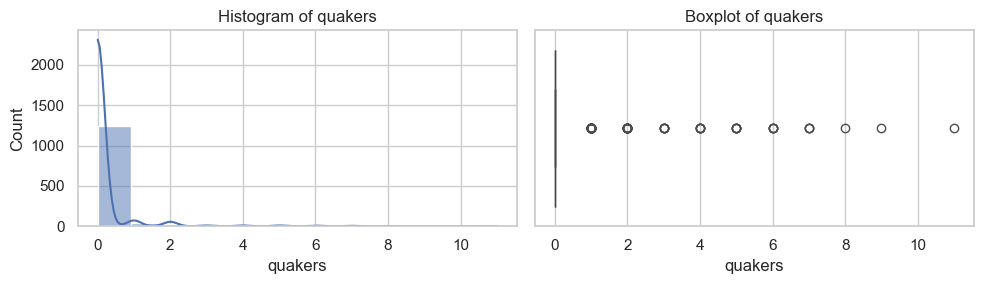

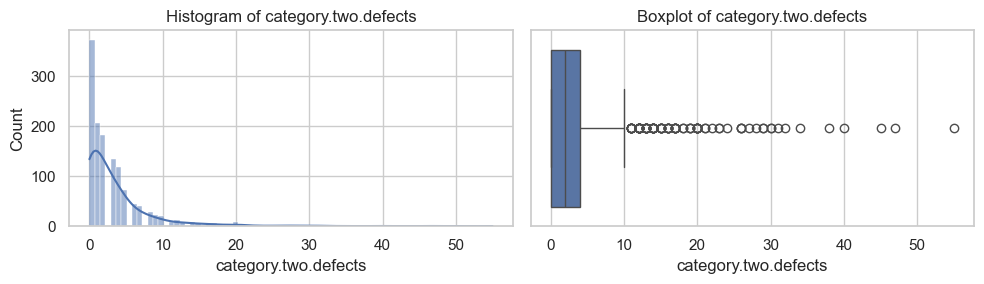

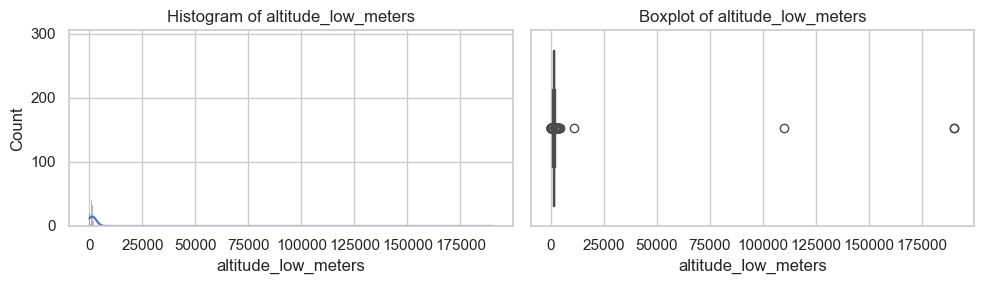

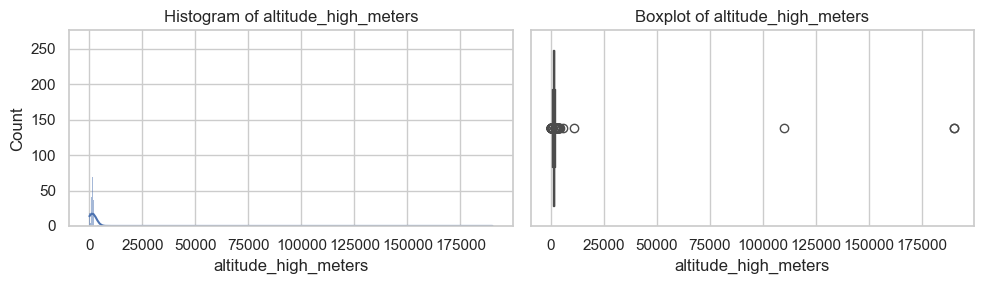

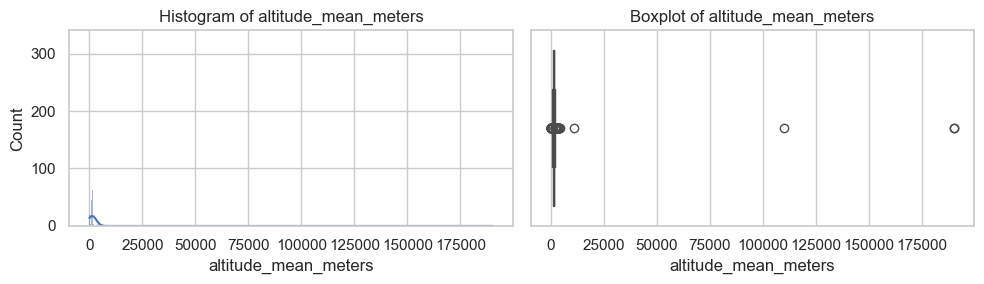

In [13]:
# Univariate plots for numeric columns (loop)
num_plot_cols = [c for c in numeric_cols if c in df.columns]
for col in num_plot_cols:
    plt.figure(figsize=(10,3))
    plt.subplot(1,2,1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Histogram of {col}')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col].dropna())
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()


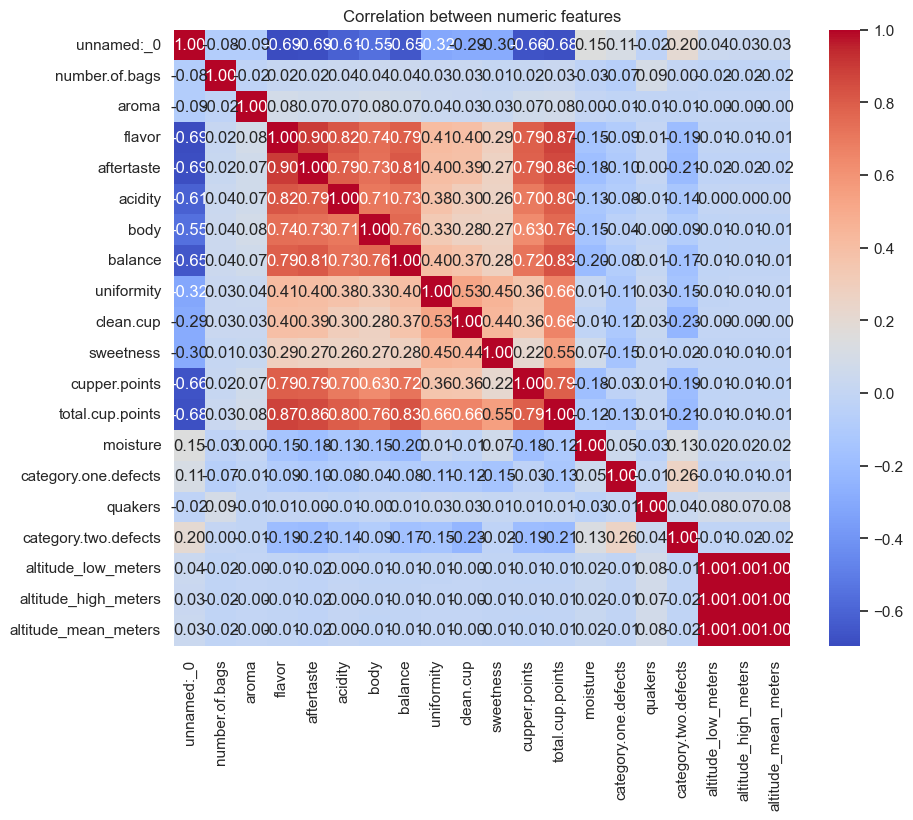

In [14]:
#Correlation matrix and heatmap
corr = df[num_plot_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation between numeric features')
plt.show()


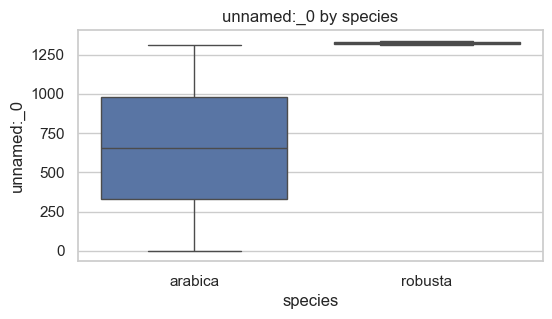

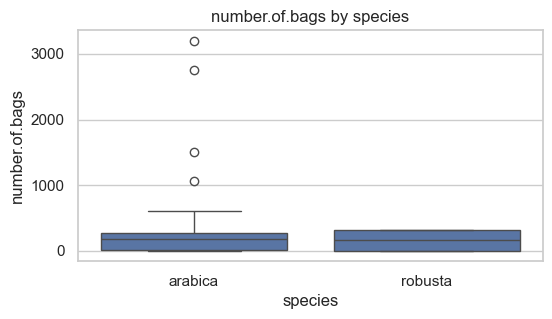

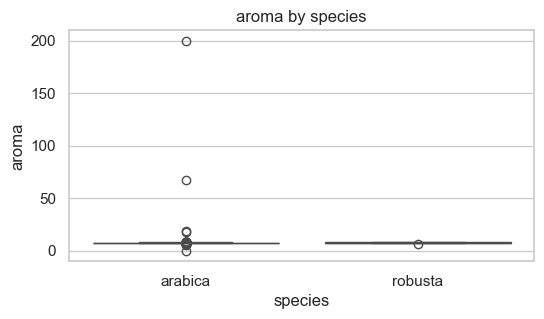

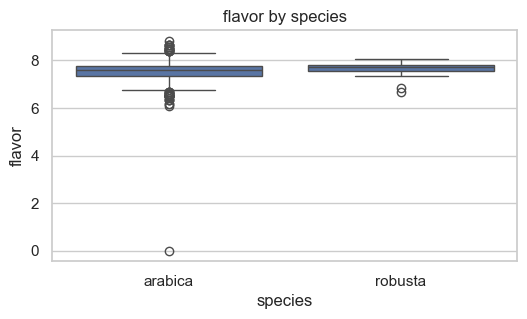

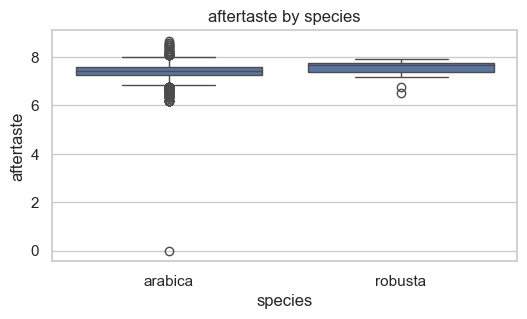

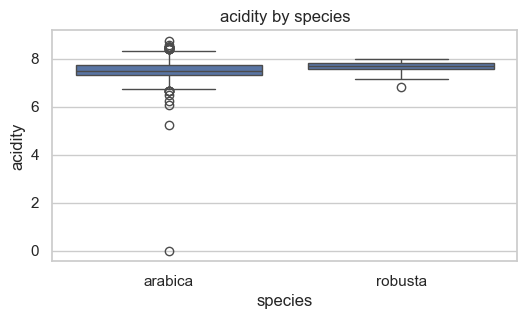

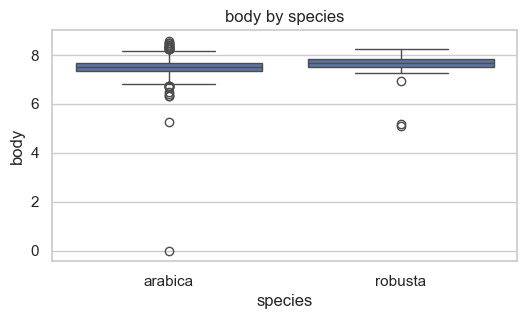

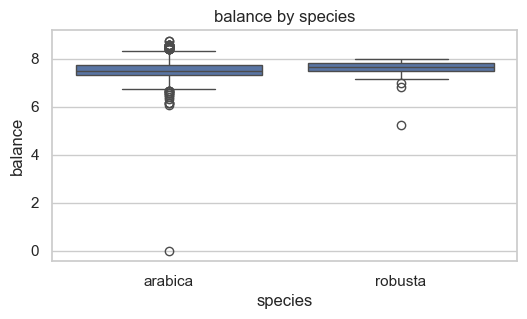

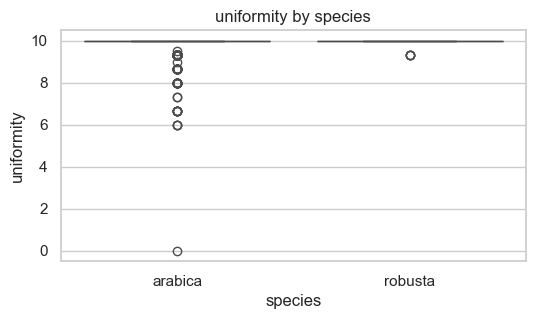

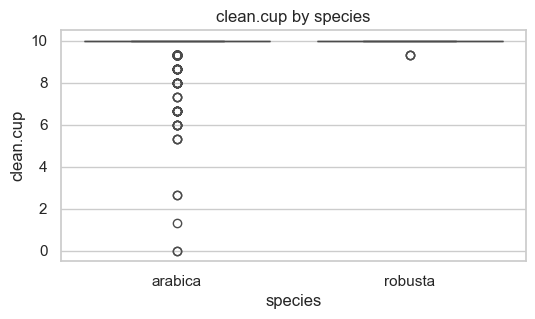

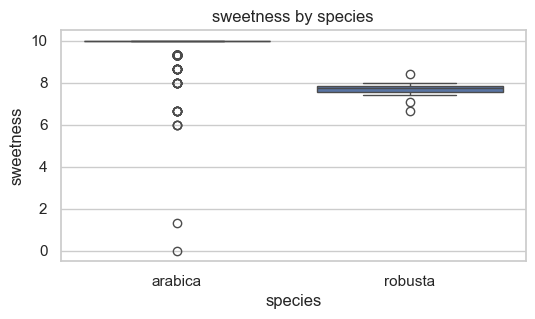

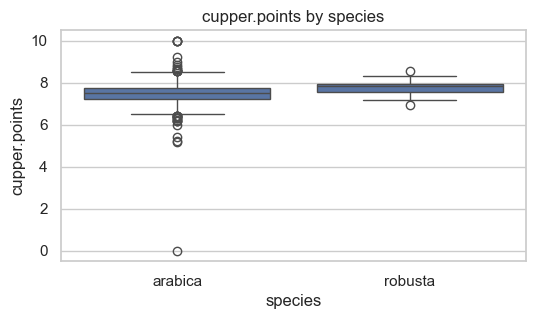

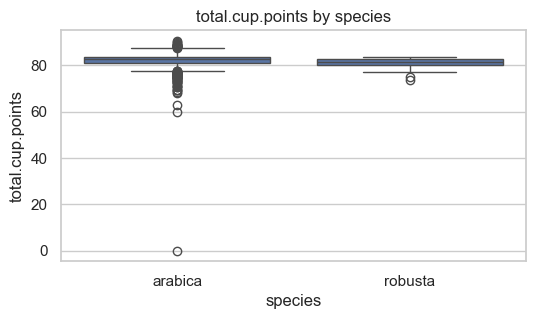

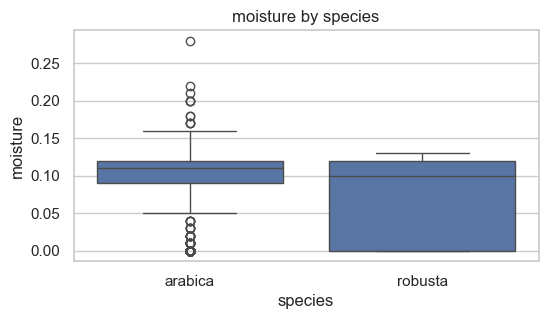

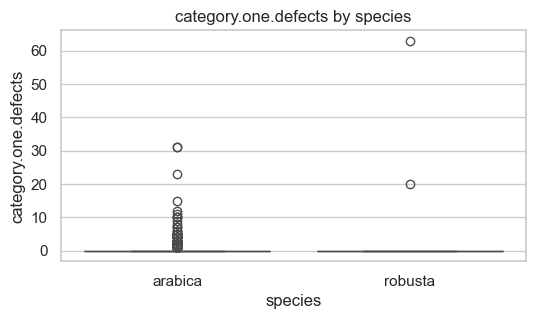

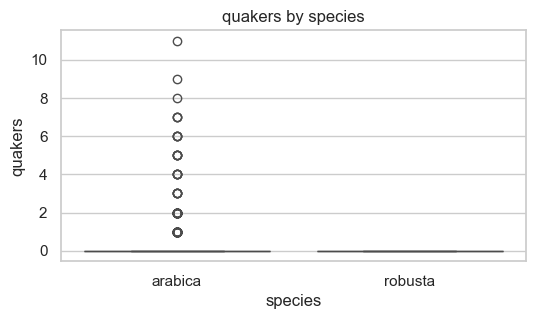

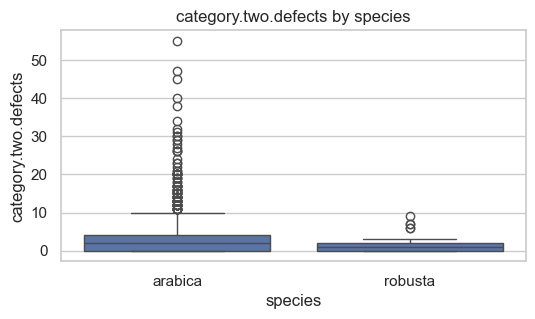

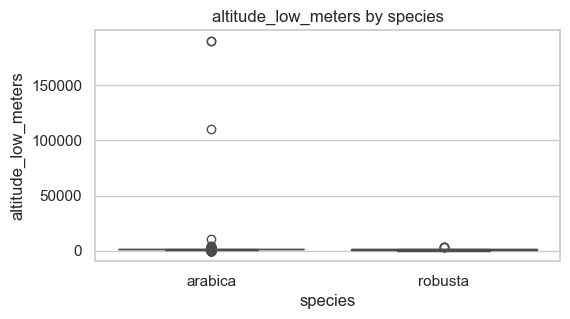

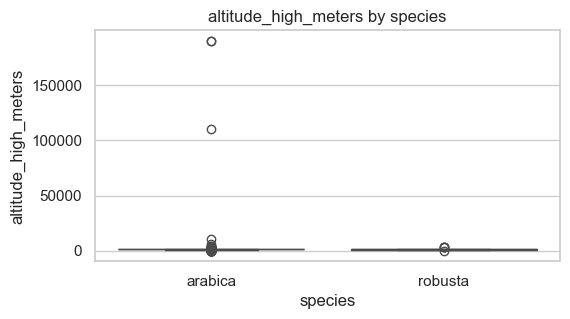

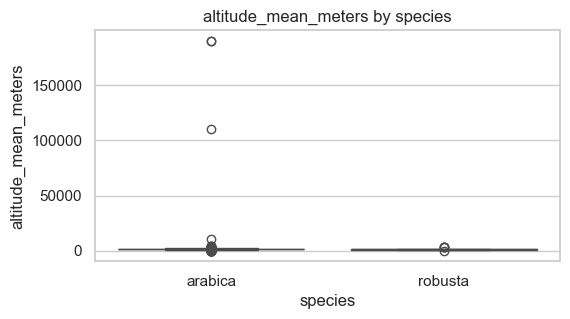

In [15]:
#Species vs quality (boxplots)
if 'species' in df.columns:
    for col in num_plot_cols:
        plt.figure(figsize=(6,3))
        sns.boxplot(x='species', y=col, data=df)
        plt.title(f'{col} by species')
        plt.show()


In [16]:
#Avg scores by country (top 10)
if 'country_of_origin' in df.columns:
    agg = df.groupby('country_of_origin')[num_plot_cols].mean()
    display(agg.mean(axis=1).sort_values(ascending=False).head(10))
    # bar chart for overall average score by country
    top = agg.mean(axis=1).sort_values(ascending=False).head(10)
    plt.figure(figsize=(8,4))
    sns.barplot(x=top.values, y=top.index)
    plt.xlabel('Average score')
    plt.title('Top 10 countries by average quality score')
    plt.show()


In [17]:
#Correlation significance (pearson) example
from scipy.stats import pearsonr
pairs = [('aroma','flavour'), ('acidity','body')]
for a,b in pairs:
    if a in df.columns and b in df.columns:
        clean = df[[a,b]].dropna()
        r,p = pearsonr(clean[a], clean[b])
        print(f'{a} vs {b}: r={r:.3f}, p={p:.3e}')


acidity vs body: r=0.706, p=6.332e-203


In [18]:
#ANOVA: for example, check if mean 'flavour' differs by species
if 'flavour' in df.columns and 'species' in df.columns:
    model = ols('flavour ~ C(species)', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    display(anova_table)
    print("Means by species:")
    display(df.groupby('species')['flavour'].mean())


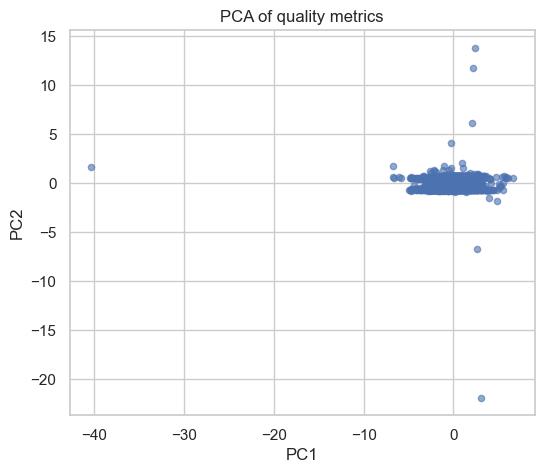

Explained variance ratio: [0.58554843 0.1275798 ]


In [19]:
#PCA
features = [c for c in num_plot_cols if c not in ['moisture','defects']][:8]  # choose relevant quality features
X = df[features].dropna()
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

pca = PCA(n_components=2)
pcs = pca.fit_transform(Xs)
plt.figure(figsize=(6,5))
plt.scatter(pcs[:,0], pcs[:,1], alpha=0.6, s=20)
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.title('PCA of quality metrics')
plt.show()
print('Explained variance ratio:', pca.explained_variance_ratio_)


C:\Users\RUBIKA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\RUBIKA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\RUBIKA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\RUBIKA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

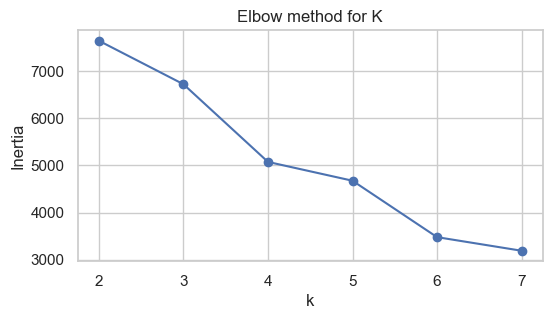

C:\Users\RUBIKA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


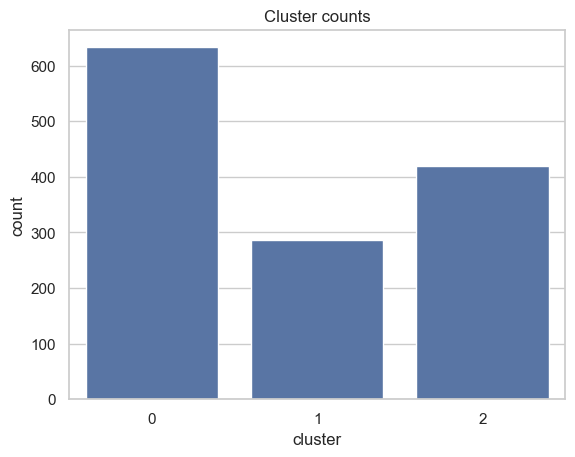

In [20]:
#KMeans clustering (choose k with elbow method)
inertia = []
ks = range(2,8)
for k in ks:
    km = KMeans(n_clusters=k, random_state=42)
    inertia.append(km.fit(scaler.fit_transform(df[features].fillna(df[features].median()))).inertia_)

plt.figure(figsize=(6,3))
plt.plot(ks, inertia, '-o')
plt.xlabel('k'); plt.ylabel('Inertia'); plt.title('Elbow method for K')
plt.show()

# Choose k (e.g., k=3) and assign cluster labels
k = 3
km = KMeans(n_clusters=k, random_state=42)
df['cluster'] = km.fit_predict(scaler.fit_transform(df[features].fillna(df[features].median())))
sns.countplot(x='cluster', data=df); plt.title('Cluster counts'); plt.show()


In [21]:
#Save cleaned dataset
df.to_csv('coffeeQuality_cleaned.csv', index=False)
print("Saved cleaned file: coffeeQuality_cleaned.csv")


Saved cleaned file: coffeeQuality_cleaned.csv
